# F21DL- Dan G1 

### Dataset 1 - World Population Live Dataset 2022

World Population Live Dataset by Country 2022, URL:https://www.kaggle.com/datasets/whenamancodes/world-population-live-dataset/code

The interesting part of this dataset would be:
analysing the population density of the world, and visualize it by heat map;
predict the future population and density.

However, this is a pretty small dataset, we are going to use this as a pratice, will change our dataset in the future.


### Dataset 2 - James Webb Telescope Images

Original size images captured by James webb telescope, URL:https://www.kaggle.com/datasets/goelyash/james-webb-telescope-images-original-size

the original size images are really big (in total of 600MB). by using Python and lib, we can modify those images and might seeing something not shown in original image, for example by using 'nipy_spectral' and change the image channel. However this would require a lot astronomy knowledge and also there are no numerical data to be analyzed, which is not suitable for our goal. 

### Dataset 3 - Bank Marketing Data Set 

URL:https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The **classification** goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


In [128]:
# !pip install country_converter

In [129]:
#!pip install seaborn

In [130]:
import sys
assert sys.version_info >= (3, 5)

In [131]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [132]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [133]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [134]:
# import plotly.express as px

# import country_converter
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go


# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [135]:
dataset = pd.read_csv('House-Price-Prediction-clean.csv')

In [136]:
dataset.shape

(1460, 32)

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [138]:
dataset.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [139]:
dataset.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,9937,5,6,1965,1965,830,136,1256,...,736,68,0,0,0,0,0,6,2008,147500


In [140]:
dataset.shape

(1460, 32)

In [141]:
dataset.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [142]:
dataset.duplicated().sum()

0

In [143]:
dataset.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


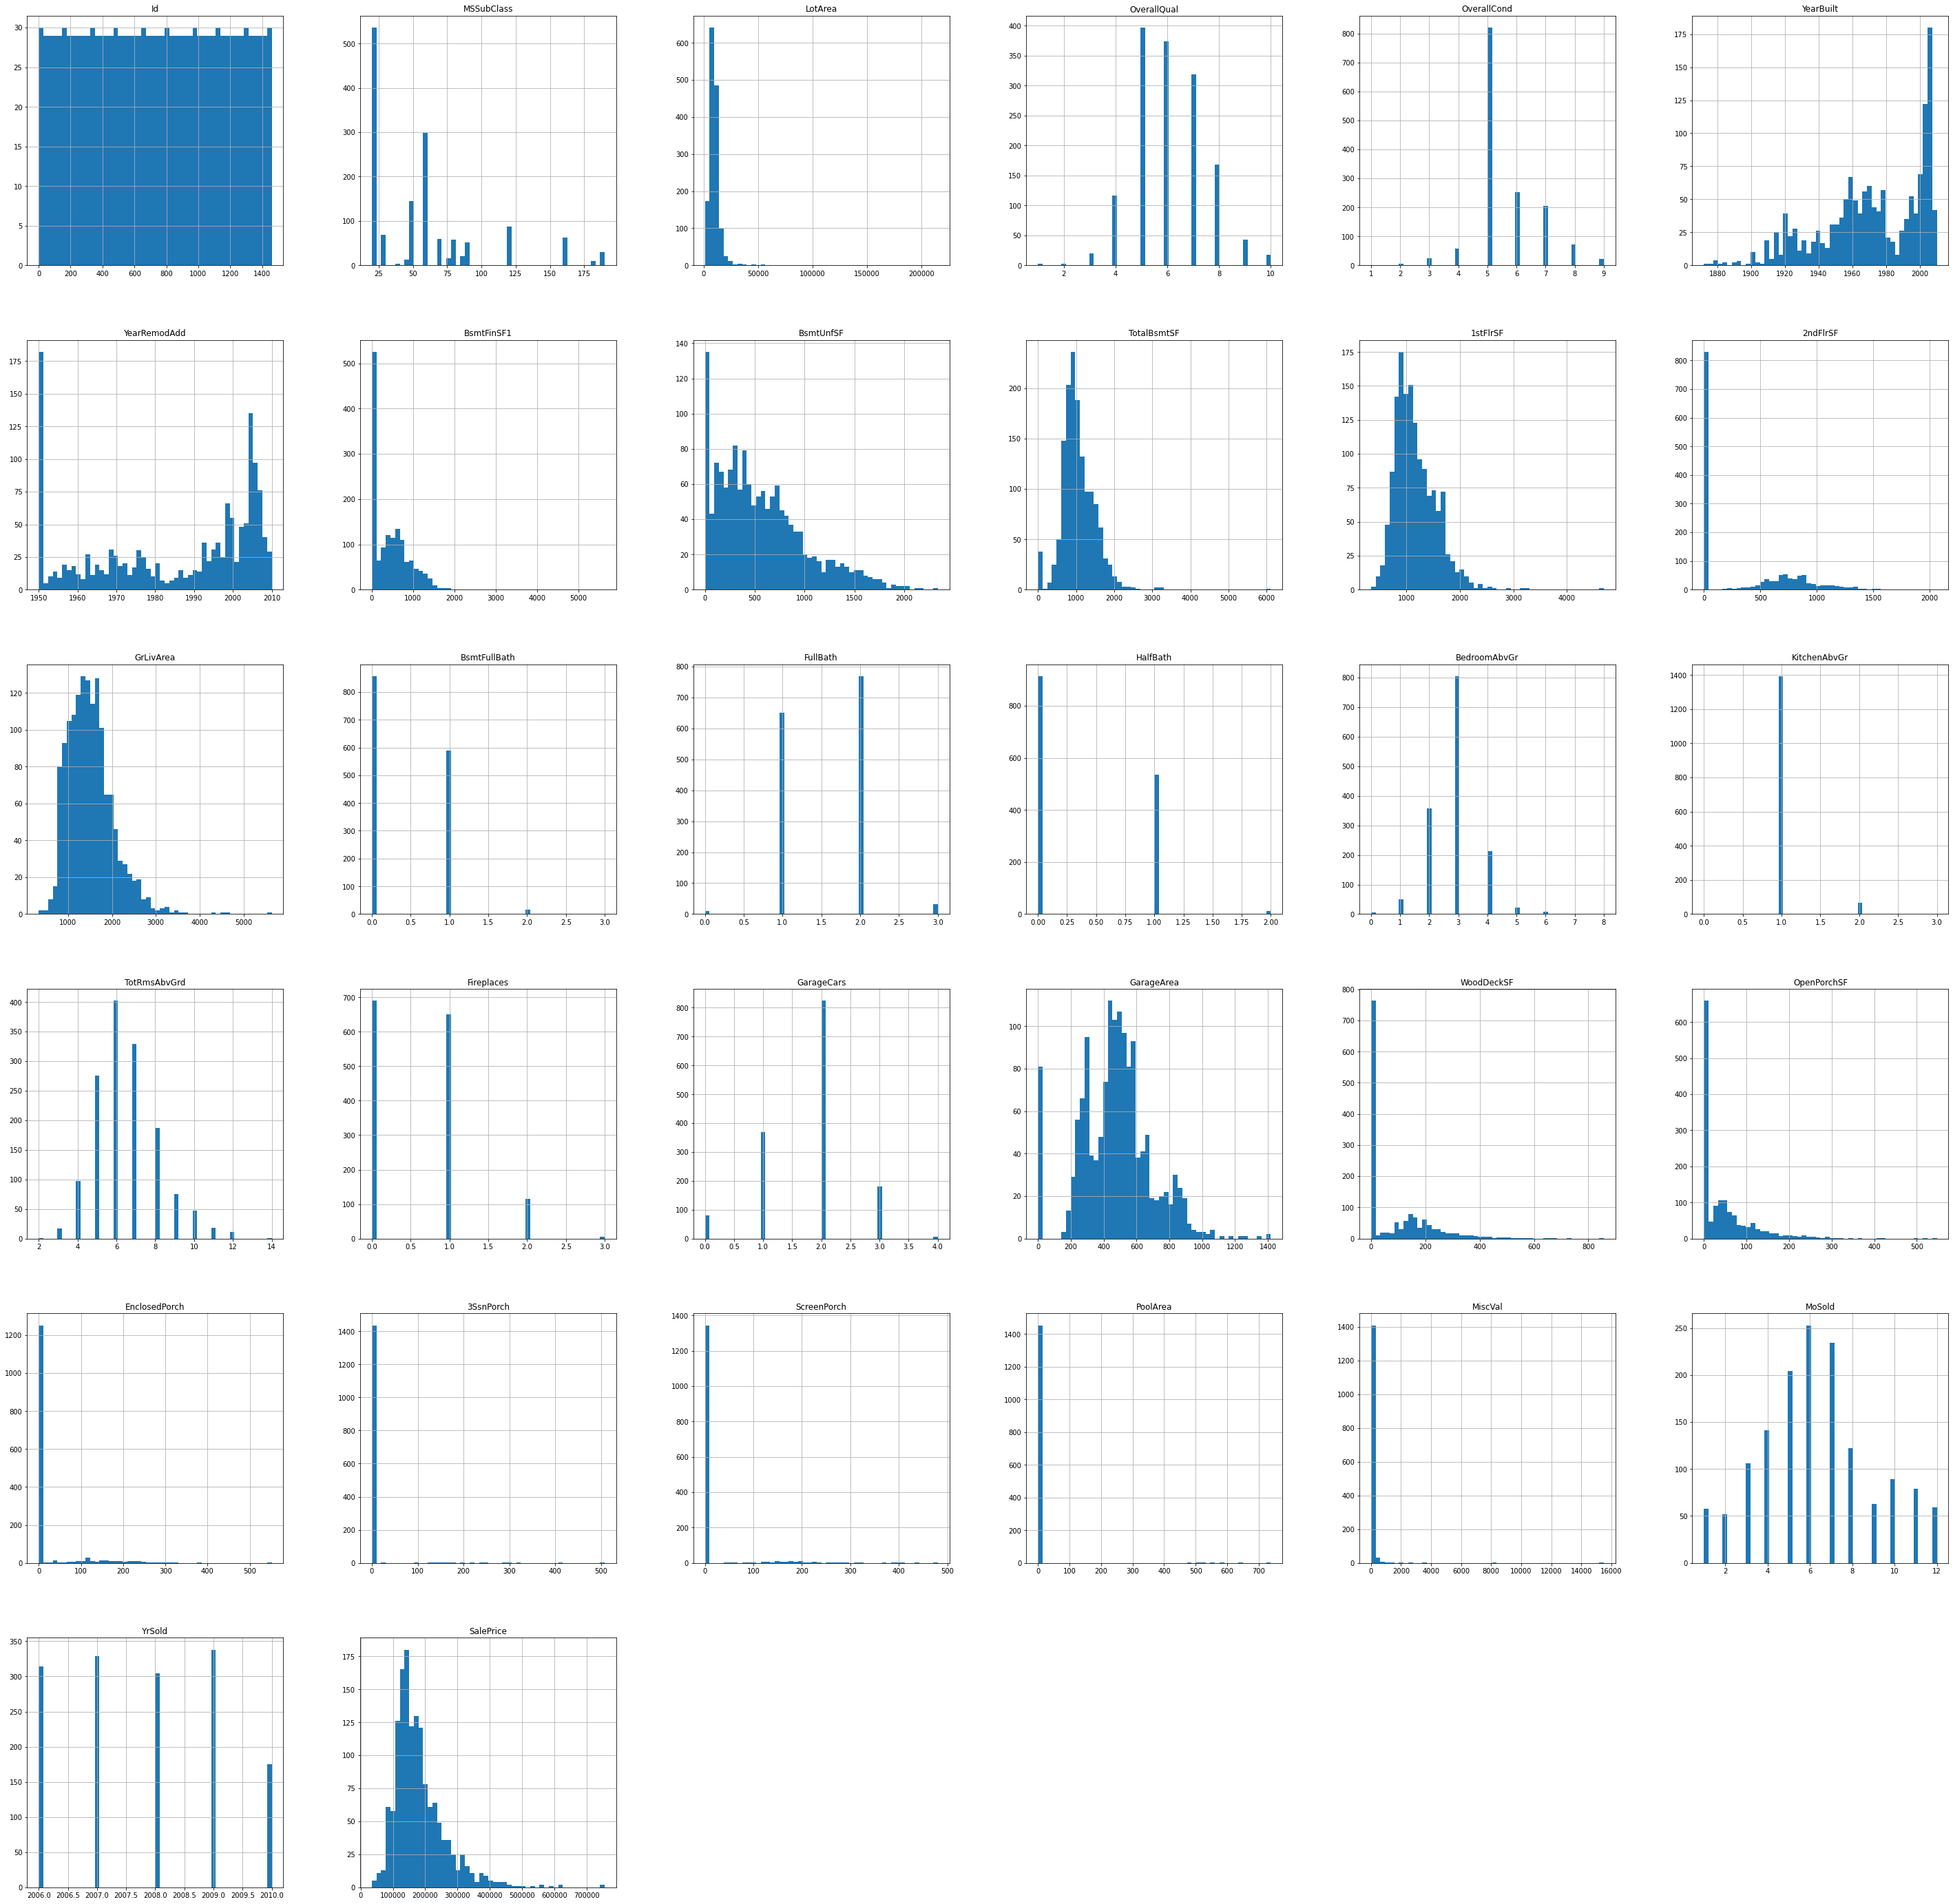

In [144]:
dataset.hist(bins=50, figsize=(50,50))
plt.show()

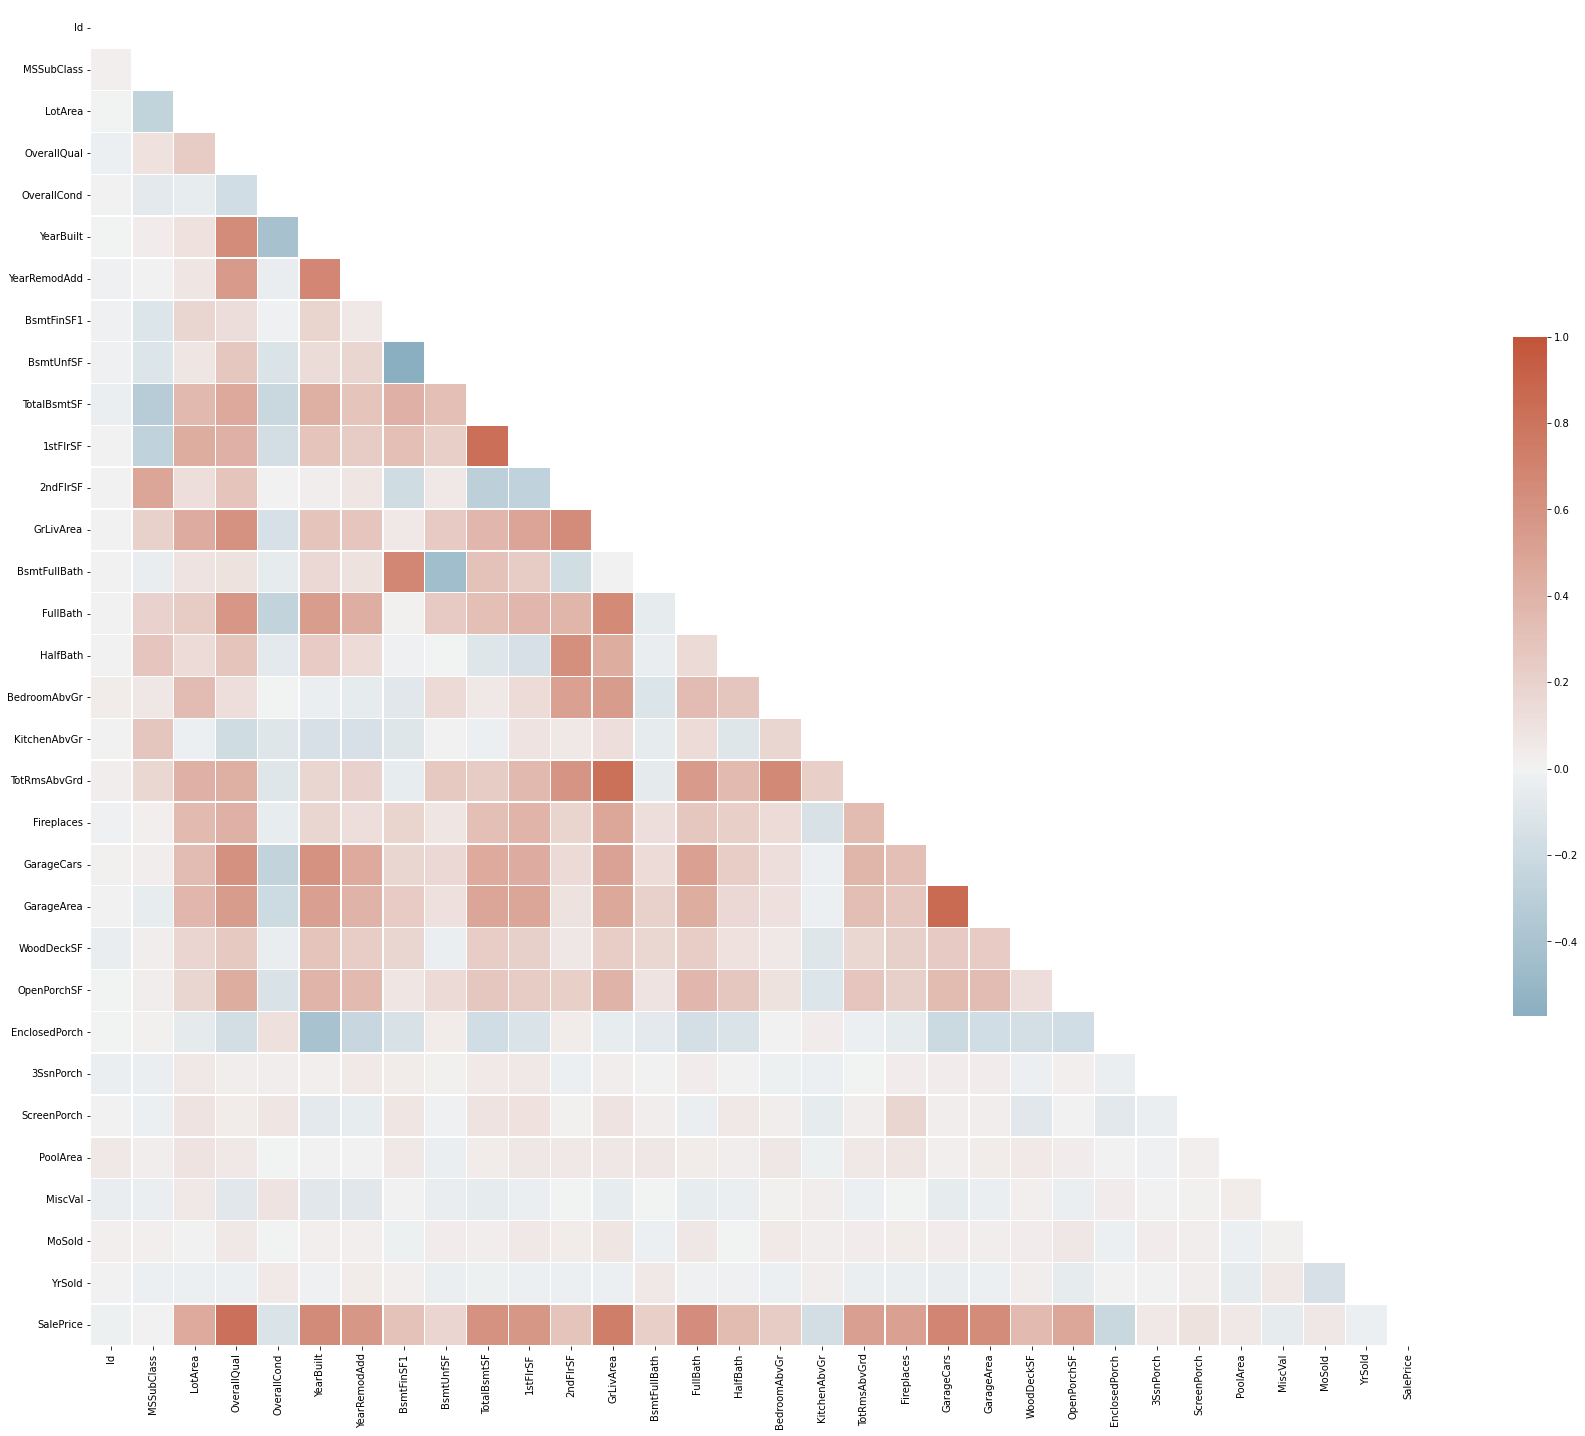

In [145]:
f, ax = plt.subplots(figsize=(30, 25))
mat = dataset.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

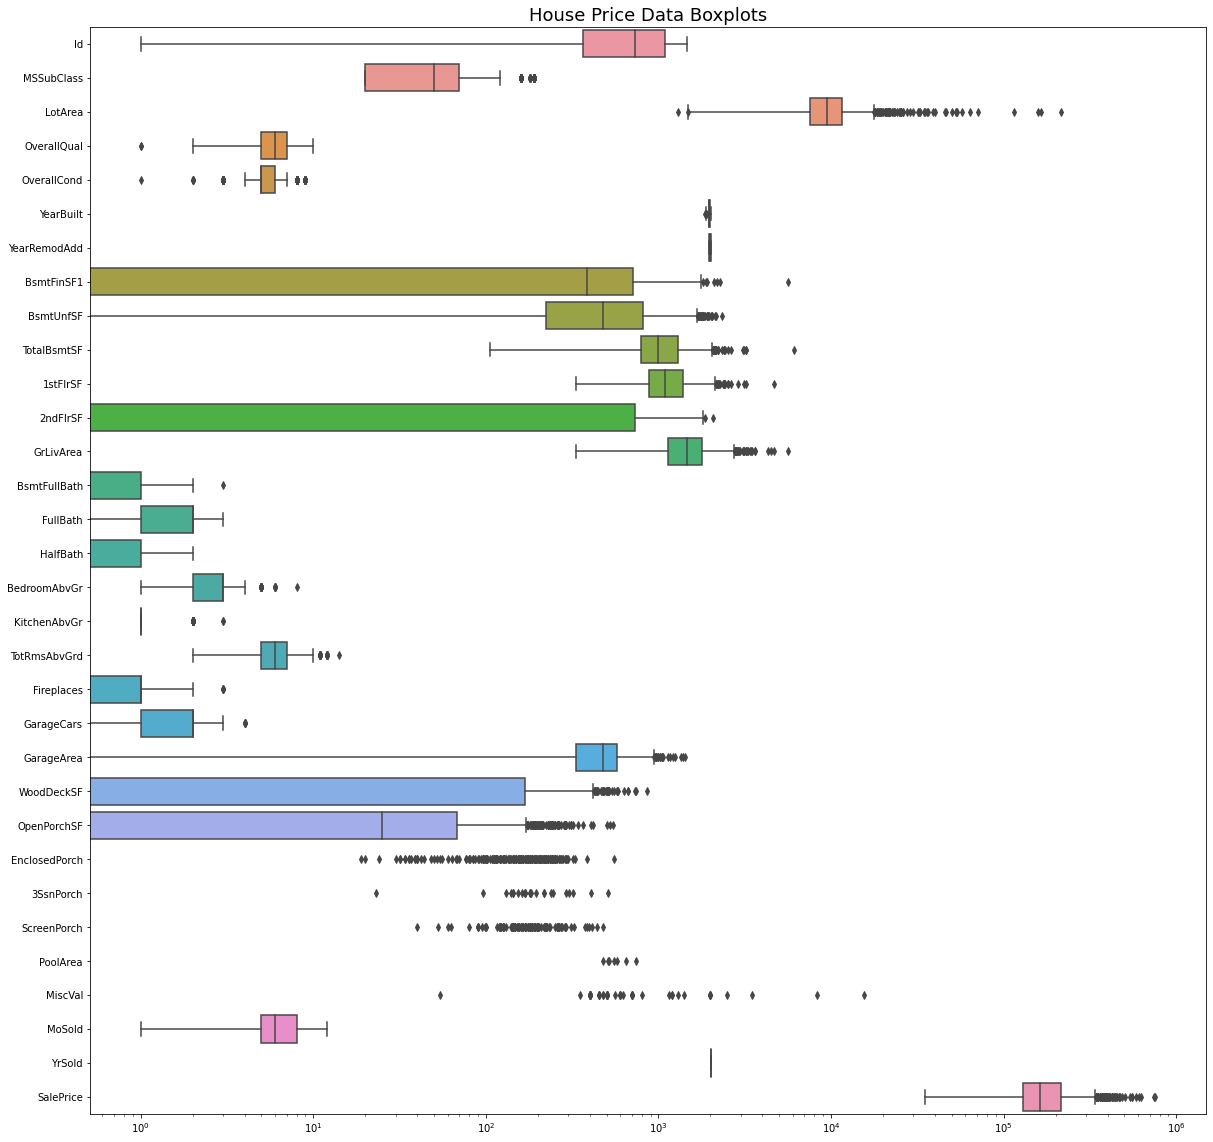

In [146]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = dataset, orient="h")
ax.set_title('House Price Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

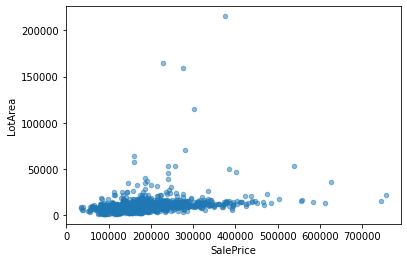

In [147]:
dataset.plot(kind="scatter", x="SalePrice", y="LotArea", alpha=0.5)

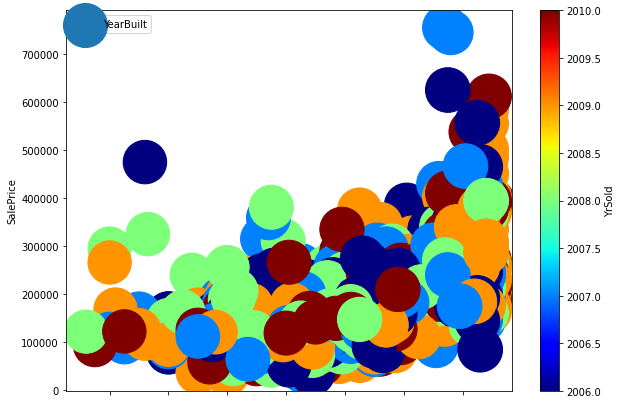

In [148]:
dataset.plot(kind="scatter", x="YearBuilt", y="SalePrice", alpha=1.0,
    s=dataset["YearBuilt"], label="YearBuilt", figsize=(10,7),
    c="YrSold", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [149]:
corr_matrix = dataset.corr()

In [150]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5ae7b0d0>,
      dtype=object)

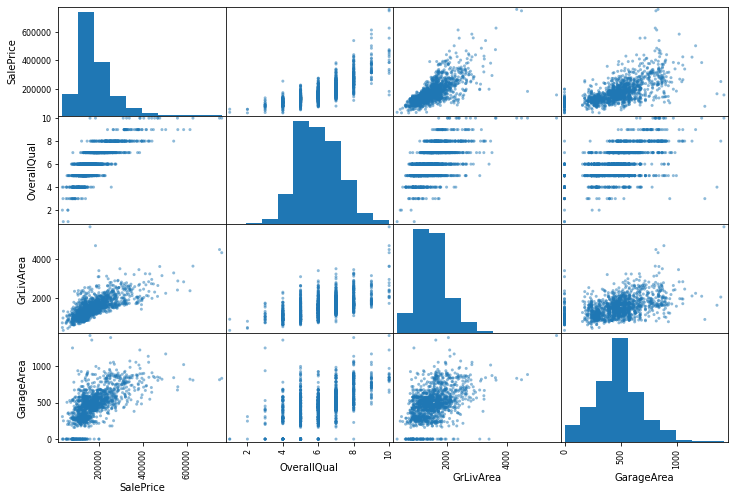

In [151]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageArea"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

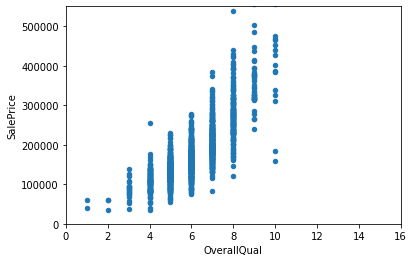

In [152]:
dataset.plot(kind="scatter", x="OverallQual", y="SalePrice",
             alpha=1.0)
plt.axis([0, 16, 0, 550000])

(0.0, 16.0, 0.0, 550000.0)

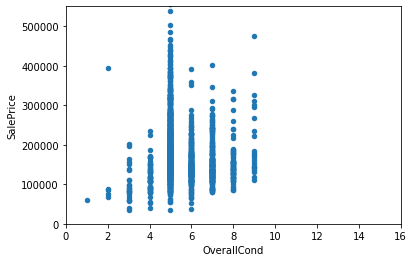

In [153]:
dataset.plot(kind="scatter", x="OverallCond", y="SalePrice",
             alpha=1.0)
plt.axis([0, 16, 0, 550000])

In [154]:
dataset["HouseAge"] = dataset["YrSold"]-dataset["YearBuilt"]

In [155]:
corr_matrix = dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HouseAge        -0.523350
Name: SalePrice, dtype: float64

In [156]:
dataset = dataset.drop("Id", axis=1) 
dataset = dataset.drop("MiscVal", axis=1) 
dataset = dataset.drop("YrSold", axis=1) 
dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge
0,60,8450,7,5,2003,2003,706,150,856,856,...,548,0,61,0,0,0,0,2,208500,5
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,460,298,0,0,0,0,0,5,181500,31
2,60,11250,7,5,2001,2002,486,434,920,920,...,608,0,42,0,0,0,0,9,223500,7
3,70,9550,7,5,1915,1970,216,540,756,961,...,642,0,35,272,0,0,0,2,140000,91
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,836,192,84,0,0,0,0,12,250000,8


In [157]:
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
sample_incomplete_rows

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge


In [158]:
#sample_incomplete_rows.dropna(subset=["CCA3"]) 

In [159]:
#sample_incomplete_rows.drop("CCA3", axis=1) 

In [160]:
# calculate the median of total_bedrooms
#sample_incomplete_rows["CCA3"].fillna("NotGIven") # option 3 Fill missing value with  median


In [161]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="mean")    # Replace each missing attribute with median of that attribute 

In [162]:
diff = dataset.drop("HouseAge", axis=1) 

In [163]:
dataset["HouseAge"].mean()

36.54794520547945

**Creating a sub dataset with the most important features using the Recursive Feature Selection from Scikit-Learn**

In [164]:
# Differencing the features and the output
X = dataset.drop('SalePrice', 1)
y = dataset['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [165]:
from sklearn.model_selection import train_test_split

# Creating training and testing sub datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [166]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
from sklearn.feature_selection import RFE
from operator import itemgetter


def keepNfeatures(n, X_train, y_train):
  # Create a sub dataset of the first one while only keeping the n most important features
  n_features_to_select = 1 # we just want the ranking for now
  rfe = RFE(regressor, n_features_to_select=n_features_to_select)
  rfe.fit(X_train, y_train)

  features = X.columns.to_list()
  for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

  rankedfeatures = sorted(zip(rfe.ranking_ , features))

  topNfeatures = []
  for i in range(n) :
    topNfeatures.append(rankedfeatures[i][1])

  df1 = dataset[topNfeatures]
  return df1

ds5features = keepNfeatures(5, X_train, y_train)
ds5features.head()

1 OverallQual
2 GrLivArea
3 TotalBsmtSF
4 GarageArea
5 BsmtFinSF1
6 1stFlrSF
7 LotArea
8 HouseAge
9 2ndFlrSF
10 YearRemodAdd
11 GarageCars
12 BsmtUnfSF
13 YearBuilt
14 MoSold
15 TotRmsAbvGrd
16 OpenPorchSF
17 OverallCond
18 FullBath
19 WoodDeckSF
20 Fireplaces
21 MSSubClass
22 BedroomAbvGr
23 KitchenAbvGr
24 BsmtFullBath
25 EnclosedPorch
26 HalfBath
27 3SsnPorch
28 ScreenPorch
29 PoolArea


,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,BsmtFinSF1
0,7,1710,856,548,706
1,6,1262,1262,460,978
2,7,1786,920,608,486
3,7,1717,756,642,216
4,8,2198,1145,836,655


**Testing the utility and vizualisation of our data using Principal Components Analysis of Scikit-Learn**

The main use of the PCA method is for data visualization purposes ; by transforming the features into fewer principal components, we can vizualize our data in a 3-dimensional graph, which is possible to plot contrary to our 30ish dimensional original dataset.

In [167]:
# Creating a copy of the dataset
df1 = dataset.copy()

# Scaling the data before applying PCA
scaling=StandardScaler()
 
# Using the fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
# Realizing the PCA with 3 PC
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Checking the dimensions of data after PCA
print(x.shape)

(1460, 3)


In [168]:
# Visualizing the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.01292141,  0.10097325,  0.29942735, -0.07821954,  0.24170617,
         0.20986943,  0.13949464,  0.10803478,  0.25085799,  0.24629074,
         0.12670761,  0.28510317,  0.07862201,  0.25380485,  0.12377066,
         0.0993364 , -0.02551502,  0.22567284,  0.18044467,  0.2758509 ,
         0.26812648,  0.13248617,  0.14402512, -0.07710299,  0.01582987,
         0.03143008,  0.04595274,  0.02217932,  0.32376171, -0.24191523],
       [ 0.15090086, -0.00880432, -0.01323931,  0.07241284, -0.2178429 ,
        -0.09098178, -0.27263698,  0.11159957, -0.18733994, -0.1244673 ,
         0.43055865,  0.27479187, -0.27194258,  0.15259312,  0.21509216,
         0.37161839,  0.1810858 ,  0.34507946,  0.03023325, -0.05879413,
        -0.08530507, -0.05595652,  0.04774357,  0.13192703, -0.03010419,
         0.02514493,  0.02033833,  0.02712464, -0.01326559,  0.21664039],
       [-0.20084382,  0.28575266, -0.08780901,  0.15169541, -0.34624322,
        -0.24749123,  0.29606778, -0.12213602,  0

This table shows us how the principal components have been calculated. There are 3 rows, one for each PC. Each of these rows have 30 values, one for each of our original features.
The PC1 value for a instance will therefore be a linear combination of the coefficients in the first row and the value of the features for this instance.

Let's now plot our new values in a 3-dimensional graph.

Text(0.5, 0, 'PC3')

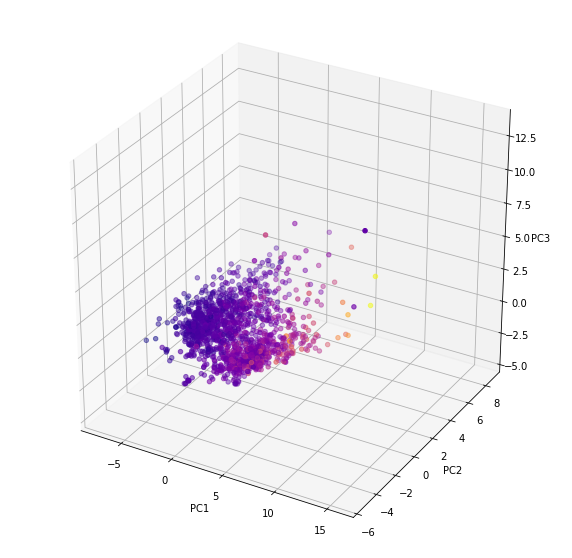

In [169]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=dataset['SalePrice'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

The values of the axis don't have a concrete meaning, but they allow us to visualize the data while keeping the most information out of them.

In [170]:
print(principal.explained_variance_ratio_)

[0.25208127 0.10762613 0.07856509]


There we can see if we can keep enough "information" of the original data into these 3 principal components. Each number represents the amount in percentage of original information preserved in the principal component.

So for example, if we chose to represent the data with only one component, we would keep only 25% of the total "information". 75% of the total information contained in our 30 features would be lost.

With 3 principal components, we calculate that we keep rougly 44% of the total information, which is a lot with only 3 components but not enough for us to conduct a relevant analysis.

By also considering than on most datasets at least 80% of the information can be preserved in 3PC, we can say that the PCA doens't work well on our dataset.